# Final ML Project: Predicting "success" of a song using Machine Learning
Mario Andrade

## Abstract and Main Goals

**The main goal**  of the project is to predict the "success" of a song based on several
metrics such as danceability, energy, key, valance, tempo, etc.
These previously mentioned metrics are provided by Spotify. I will try to successfully train a model to predict a song's popularity score, based on its technicalities and parameters determined by Spotify



*   Is there any correlation between the technicalities of a song with its success?


By training a machine learning
model, we could be able to determine it.


*    Is it possible to predict if a song will
be popular because it is in a certain key, with specific valance, tempo and
danceability?

We will find out

## Project initialization

**The Dataset**

The dataset chosen is simply called "Spotify datasets" uploaded to Kaggle by Lehak Narnauli. In it, we find "tracks.csv" a csv file in which the necessary information for this project is easily observable. In it we can find several columns that look like the following image and contain continuous and discrete variables. These columns describe the technicalities of each song in floats or integrals and a few strings. Continuous variables include danceability, acousticness and energy for example, meanwhile discrete are key (range of keys in musical scale), mode, or if a song is explicit or not. Columns such as date, name, artist or id are not important in this project.

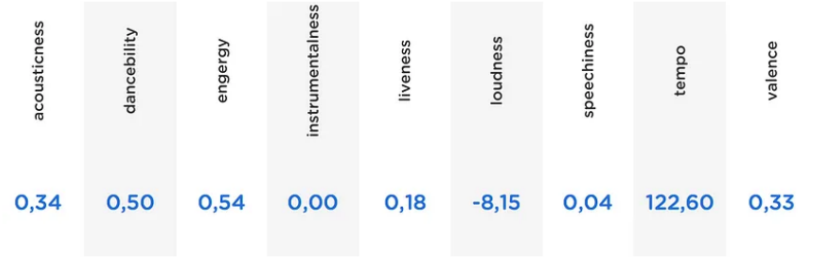

In [ ]:
!gdown 1vTv7wtj3DzUQ3C5hRNsJW41rCavWEZ5_ #For reproduceability, the dataset used
'''
Link to the dataset available on Kaggle:
https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets?select=tracks.csv
by LEHAK NARNAULI
'''

Downloading...
From: https://drive.google.com/uc?id=1vTv7wtj3DzUQ3C5hRNsJW41rCavWEZ5_
To: /content/tracks.csv
100% 111M/111M [00:00<00:00, 143MB/s]


'\nLink to the dataset available on Kaggle:\nhttps://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets?select=tracks.csv\nby LEHAK NARNAULI\n'

In [ ]:
''' Basic Imports for the whole project '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv("tracks.csv") #Import and creation of df1, main dataframe
df1.sort_values(by='popularity', ascending=False)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.6960,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.4360,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.6950,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.8260,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.5240,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23410,0sniGbmm1sjg51BxO6AHD4,O Pardesi Musafir,0,198053,0,"['Suraiya', 'Lata Mangeshkar']","['71lk7UDkZK1mabUE6LCASW', '61JrslREXq98hurYL2...",1949-01-01,0.682,0.3050,1,-8.558,1,0.0578,0.9240,0.000000,0.119,0.910,152.850,3
23409,0sk8KA96i9MIU8St2nmbIx,Mere Dil Mein Aao Aur Bas Jao,0,171133,0,['Suraiya'],['71lk7UDkZK1mabUE6LCASW'],1949-01-01,0.527,0.2030,7,-14.199,1,0.0667,0.9900,0.000012,0.129,0.688,170.733,4
23408,0sdkzsc3WtZIrSi1nNyl7v,"Diversions, Op. 21: Variation 9, Toccata I",0,46720,0,"['Benjamin Britten', 'Leon Fleisher', 'Seiji O...","['7MJ1pB5d6Vjmzep2zQlorn', '6ncNdxBc8zVWMOF7nJ...",1949,0.441,0.2420,6,-28.776,1,0.0323,0.9290,0.955000,0.116,0.528,132.060,4
23407,0s6h3lMdJsWkpUAW6xC7m3,John Henry,0,189973,0,['Lead Belly'],['3Ovf2lytXSXWFM2cwsJACC'],1949,0.593,0.7480,2,-6.514,0,0.4060,0.8880,0.021800,0.680,0.732,123.634,4


We can see above that there are 586672 rows with 20 columns. More than half a million rows. Enough data for what we need. The songs span from 1920 to April 16th 2021. That is, two years ago. We can assume that this data is updated until that time, so the popularity scores for each song could have changed since then, as Spotify's algorithm for calculating the score takes into account the recent plays.

# Data Visualization for preprocessing

In order to start working on the different models, we first need to understand the data we are working with. Therefore, I plotted the frequency of each score throughout the data set and found the following results:

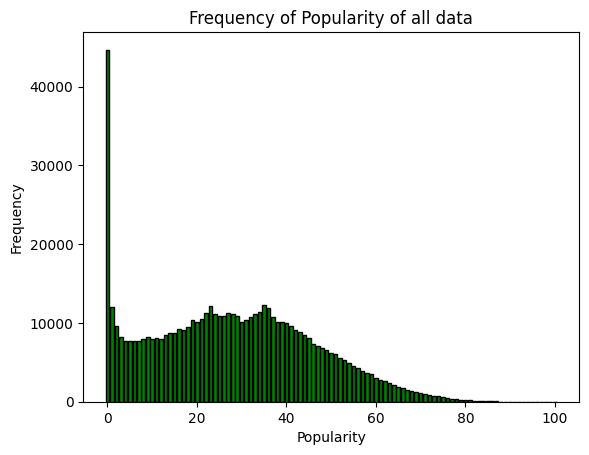

In [ ]:
popularity_freq = df1['popularity'].value_counts()
# create bar plot
plt.bar(popularity_freq.index, popularity_freq.values, color="green", edgecolor='black')

# set plot title and labels
plt.title('Frequency of Popularity of all data')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

# show plot
plt.show()

df1.dropna(inplace=True)

As wee can see in this frequency plot, we can see that the number of songs with a score of 0 popularity far outnumbers the other scores. We see a data distribution than, after leaning to the far left, is concentrated between the 20-40 score. Taking into account the sheer amount of songs available on Spotify, it is pretty obvious that there would be a huge amount of unheard/unpopular songs in the platform. The amount of songs with a score more than 90 are a handful. But, those are the extreme examples. We do not know exactly how Spotify quantifies score.

In order to preprocess the data and start with our models, I will be changing the original column 'duration_ms' from here on out, as it describes the time of the song in miliseconds, which does not help, so I am changing it to minutes. In the column before

In [ ]:
df1['duration_min'] = df1['duration_ms'] / 60000 #miliseconds to minutes
pd.set_option('display.max_columns', None)
df1 = df1.drop(df1.index[[67509]]) #we delete one random row to equally divide or train/val/test later on
df1

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,2.115050
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1.636667
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,3.027333
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,2.948450
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,2.718000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,4.304450
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2.554883
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,3.126683
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2.366717


Next, we visualize the columns and its correlations with the spearman method.

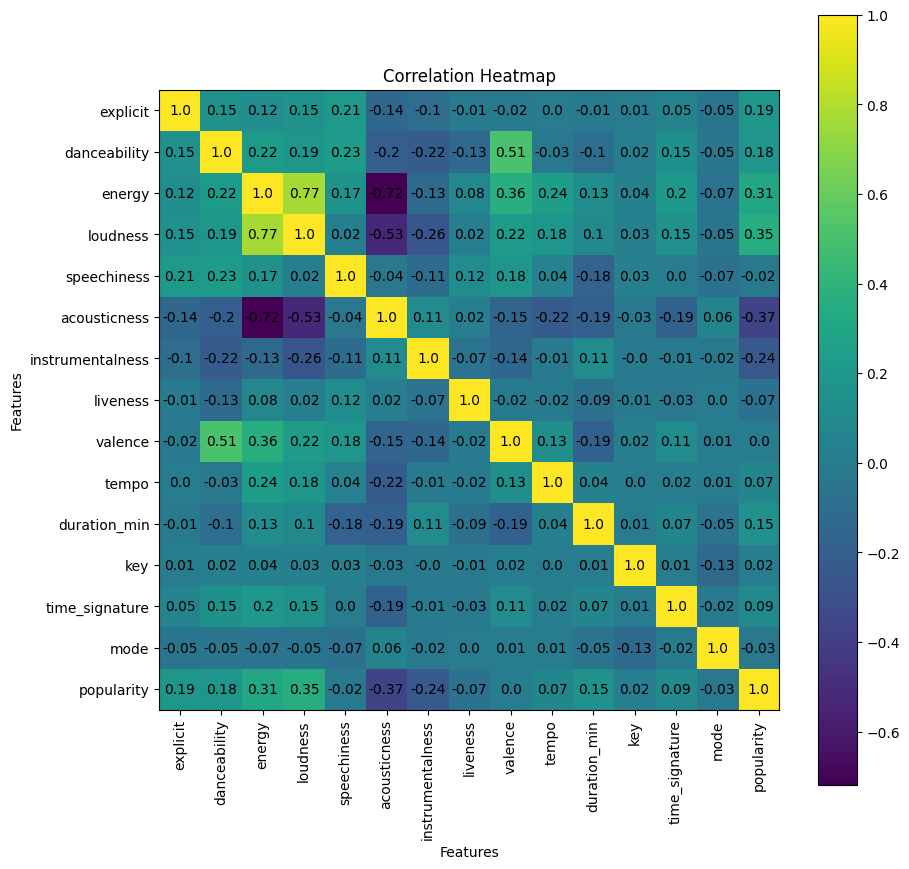

In [ ]:
cols = ['explicit', 'danceability', 'energy', 'loudness', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'duration_min', 'key', 'time_signature', 'mode', 'popularity'] #columns to correlate

corr = df1[cols].corr(method='spearman') #spearman correlation

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(corr, cmap='viridis')

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels and ticks
ax.set_xticks(range(len(cols)))
ax.set_yticks(range(len(cols)))
ax.set_xticklabels(cols, fontsize=10, rotation=90)
ax.set_yticklabels(cols, fontsize=10)

# Set title and labels
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")

# Loop over data dimensions and create text annotations.
for i in range(len(cols)):
    for j in range(len(cols)):
        text = ax.text(j, i, round(corr.iloc[i, j], 2),
                       ha="center", va="center", color="black")

plt.show()

After checking the heatmap with an emphasis on the popularity column we can see that we have some positive correlations but also some negative ones. No correlation score is bigger than 0.4 meaning that we may not be able to develop a very accurate model as the data is not telling us too much. Even so, we get that the biggest correlation scores that we got were from 'time_signature', 'duration_min, 'tempo', 'loudness', 'energy', 'danceability', 'explicit'. Loudness and energy are not a big surprise though, as songs with energetic melodies are popular.

Now, taking an in depth look at the columns, I can notice that 'explicit' and 'mode' are not continous variables, they are discrete. Binary to be exact, as 'Explicit' column tells us if the song has explicit content or not, and 'Mode' tells us if the song is in a minor or major key. Also, 'key' needs to be modified, as it increments because the integers represent the key the song is on. But, because the value in itself has no 'additional' value (having more does not mean 'more' but another key) we have to expand it. The same thing has to be done to 'time signature' as the numbers indicate if the song has a time signature (how many counts are in each measure: 1, 2, 3, 4 or 5). This way, when one of the derived columns has 1, the others have to be 0.


In [ ]:
df1['duration_min'] = df1['duration_ms'] / 60000
pd.set_option('display.max_columns', None)
data = pd.get_dummies(df1, columns=['time_signature', 'key', 'mode'], drop_first=True)
data
print(data.columns)

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_min', 'time_signature_1',
       'time_signature_3', 'time_signature_4', 'time_signature_5', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9',
       'key_10', 'key_11', 'mode_1'],
      dtype='object')


In [ ]:
features = ['explicit', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_min', 'time_signature_1', 'time_signature_3',
       'time_signature_4', 'time_signature_5', 'key_1', 'key_2', 'key_3',
       'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'mode_1']

'''
#Top Features only, tried to improve results
features= ['time_signature_1', 'time_signature_3','time_signature_4', 'time_signature_5',
           'duration_min', 'tempo', 'loudness', 'energy', 'danceability', 'explicit',
           'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11',]
'''
X= data[features]
y= data['popularity']

# Training Models

In order to start training my machine learning models, I first have to import basic modules to be used later on, as well as the columns that will be used to predict the desired column, "popularity", so we define them as our X and y. Also, we divide our data into our training/validation/test split, with a split of 80-10-10. We obtain a histogram of our y_train and the shapes of our splits: 469280-58660-58661.

469280 58660 58660


<Axes: >

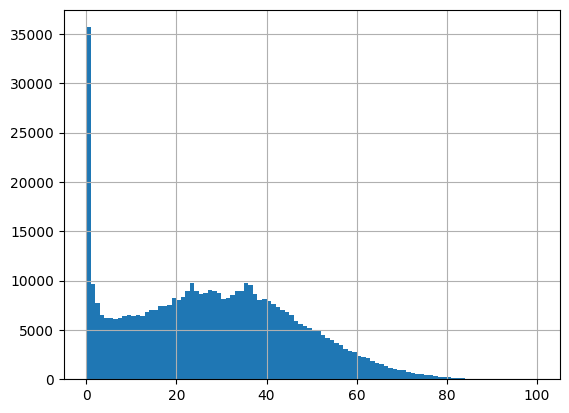

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


'''
We double split our data- first we split the test size to 80-20
and then to 10-10, finally getting 80-10-10
'''

X_train, x_val_test, y_train, y_val_test  = train_test_split(X, y, test_size=0.20, random_state=40)

# Split the remaining observations into validation and test
X_val, X_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=40)


# Print the numerosities of the three samples
print(X_train.shape[0], X_val.shape[0], X_test.shape[0])
y_train.hist(bins=100)


## Linear Regression Model

So, because we are looking to predict the popularity score of new tracks, we have to use models fitted for regression. One of the most popular and common of these models is Linear Regression, which we will be using in other to quickly check what we are up against in terms of training an effective model. This is mainly because we have continous data and we need to predict data, so regression models are the way to go. The following is an implementation of Linear Regression:

Accuracy: 23.27%
MSE on training set:
260.98987605903346
MSE on validation set:
262.8451863688829
R squared on training set:
0.22633480218484436
R squared on validation set:
0.22508137486617874


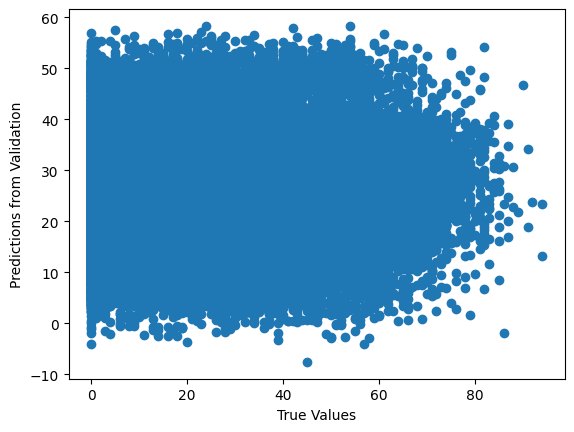

In [ ]:
# Linear Regression model, fitting for it
lr = LinearRegression()
lr.fit(X_train, y_train) #Training
score = lr.score(X_test, y_test) #sklearn metric which returns the mean accuracy on the given test data and labels. (used to give a rough estimate)

y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val) #predicting test and validation

print('Accuracy: {:.2f}%'.format(score * 100))
print('MSE on training set:')
print(mean_squared_error(y_train, y_train_pred))
print('MSE on validation set:')
print(mean_squared_error(y_val, y_val_pred))


print('R squared on training set:')
print(r2_score(y_train, y_train_pred))
print('R squared on validation set:')
print(r2_score(y_val, y_val_pred))

plt.scatter(y_test, y_val_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions from Validation')
plt.show()

We got the results above from the Linear Regression. What does this tells us? Well, we can easily see in the scatter plot that there were some outliers and that generally, this model did not do that well as we have an R squared result of 22.5% which is pretty bad as it tells us that the regression line that is being created for this data misses the points more often than not, hence the low score. Will we be able to get better results with other models?

## Decision Trees

Another popular model that we will try using to have a better result than the one linear regression gave is Decision Trees. As we are trying to predict, we will be using DecisionTreeRegressor, not Classifier. First, we try to find which is the max_depth of our tree that we should be using, as it is a hyperparameter that can greatly help us better the root mean squared error. We did so by plotting the RMSE against max_depth from 1 to 15. Essentially, the Elbow Method.

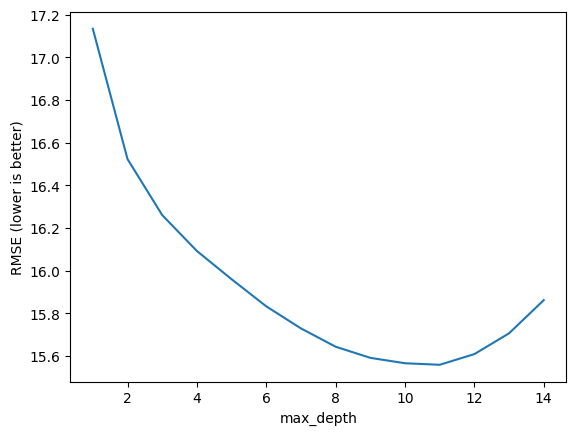

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
max_depth_range = range(1, 15)
RMSE_scores = []
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

We find out that our most optimal max_depth is between 10 and 11, as we can see a little dip before it goes up when it equals 12. So, we will use it in our Decision Tree Regressor in the next code;

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

dtr = DecisionTreeRegressor(random_state=1, max_depth=11)
dtr.fit(X_train, y_train)
y_train_pred = dtr.predict(X_train)
y_val_pred = dtr.predict(X_val)
score = dtr.score(X_test, y_test)


print('Accuracy: {:.2f}%'.format(score * 100))
print('MSE on training set:')
print(mean_squared_error(y_train, y_train_pred))
print('MSE on validation set:')
print(mean_squared_error(y_val, y_val_pred))
print('R squared on training set:')
print(r2_score(y_train, y_train_pred))
print('R squared on validation set:')
print(r2_score(y_val, y_val_pred))


Accuracy: 31.73%
MSE on training set:
221.0342079954368
MSE on validation set:
233.51940251479556
R squared on training set:
0.34477736518015045
R squared on validation set:
0.311539477520142


With our Decision Tree Regressor we get an R squared of 31.1% on the validation set. Which, is not amazing by any means, but it is an improvement of 8% fo what we got with Linear Regression. We use the same parameter of max_depth, and for the number of estimators, I decided to use 400 by trial and error, it was the one that gave the best score and still had a reasonable running time and  was computationally feasible. We then try with a Forest Regressor;

In [ ]:
rf = RandomForestRegressor(n_estimators = 400, max_features = 'sqrt', max_depth = 11, random_state = 1).fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)
score = rf.score(X_test, y_test)

print('Accuracy: {:.2f}%'.format(score * 100))
print('MSE on training set:')
print(mean_squared_error(y_train, y_train_pred))
print('MSE on validation set:')
print(mean_squared_error(y_val, y_val_pred))
print('R squared on training set:')
print(r2_score(y_train, y_train_pred))
print('R squared on validation set:')
print(r2_score(y_val, y_val_pred))

Accuracy: 32.93%
MSE on training set:
221.2991443539015
MSE on validation set:
228.85645416809174
R squared on training set:
0.34399200122935236
R squared on validation set:
0.3252867542795749


We get a score of 32.5% which is not even as big of an improvement as the last one. We compare the Decision Tree and the Forest and it only got better by 1.4% which taking into account that it took 7 seconds to run the Decision Tree vs 7 minutes it took for the RandomForest, it may not be worth it.

Finally, we try using AdaBoost to try and get even better results as we have not been very lucky, I do this by using the Decision Tree we created as an estimator. I played around the number of estimators and the learning rate and got the best results with the amount that is shown down below in the code.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(estimator=dtr, n_estimators=100, learning_rate=0.1, random_state=1)

abr.fit(X_train, y_train)

y_train_pred = abr.predict(X_train)
y_val_pred = abr.predict(X_val)

score = abr.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(score * 100))
print('MSE on training set:')
print(mean_squared_error(y_train, y_train_pred))
print('MSE on validation set:')
print(mean_squared_error(y_val, y_val_pred))
print('R squared on training set:')
print(r2_score(y_train, y_train_pred))
print('R squared on validation set:')
print(r2_score(y_val, y_val_pred))

Accuracy: 33.59%
MSE on training set:
215.5822124951413
MSE on validation set:
226.6012130065165
R squared on training set:
0.360938985090148
R squared on validation set:
0.3319356429444805


With AdaBoost we get an R squared on the validation set of 33.2% which is still way, way lower than what would be desireable. We will se if using Neural Networks helps us.

## Neural Networks.

We will try to train a Neural Network in order to see if we can get a better result. We start off by making sure that torch is installed, along with torchmetrics, another module that will help us calculate the scores to compare.

In [ ]:
!pip install torch
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We import some important modules that will be of usage for my Neural Network. As well as converting the data splits into tensors. We also check the size of the tensors.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import tqdm
import copy


X_train = torch.tensor(X_train.values, dtype=torch.float32) #torch tensor reshaping
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1) #torch tensor and reshape
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

In [ ]:
print(X_train.size())
print(X_test.size())
print(y_train.size())
print(y_test.size())

torch.Size([469280, 27])
torch.Size([58660, 27])
torch.Size([469280, 1])
torch.Size([58660, 1])


The neural network architecture defined in model consists of three fully connected layers (with 27, 24, 12, and 6 units, respectively) followed by ReLU activation functions and batch normalization layers. The loss function used in this code is mean squared error (MSE), which is a common choice for regression problems. The Adam optimizer is used to update the model parameters during training. This optimizer was chosen because after a couple of experiments with SGD, it was concluded that it gave better results in this case. This architecture of the model was concluded with suggestions made by lab TA.

The code then runs a loop over a specified number of epochs, where each epoch includes training the model on mini-batches of data, computing the training loss, and evaluating the model on a separate validation set. The training and validation losses are then plotted over time to monitor the model's progress.

In addition, the code computes and prints several evaluation metrics, including the R2 score, MSE, and RMSE, which are commonly used to assess the quality of a regression model. This is the final model that was deemed the "best" result after a lot of hyperparameter tuning, batch size changes, number of neurons, layers, epochs, etc. The link to the rough Google Collab can be found at the end of this notebook.

Epoch 0 had training loss 278.0050
Validation loss: 240.73
R2Score: 0.28
MSE: 240.73
RMSE: 15.52
Epoch 1 had training loss 288.6400
Validation loss: 237.38
R2Score: 0.29
MSE: 237.38
RMSE: 15.41
Epoch 10 had training loss 248.8867
Validation loss: 226.55
R2Score: 0.33
MSE: 226.55
RMSE: 15.05
Epoch 20 had training loss 245.0842
Validation loss: 225.70
R2Score: 0.33
MSE: 225.70
RMSE: 15.02
Epoch 30 had training loss 242.4536
Validation loss: 224.46
R2Score: 0.33
MSE: 224.46
RMSE: 14.98
Epoch 40 had training loss 246.9263
Validation loss: 223.34
R2Score: 0.34
MSE: 223.34
RMSE: 14.94
Epoch 50 had training loss 240.7312
Validation loss: 223.01
R2Score: 0.34
MSE: 223.01
RMSE: 14.93
Epoch 60 had training loss 238.1565
Validation loss: 222.87
R2Score: 0.34
MSE: 222.87
RMSE: 14.93
Epoch 70 had training loss 229.1002
Validation loss: 222.37
R2Score: 0.34
MSE: 222.37
RMSE: 14.91
Epoch 80 had training loss 232.8145
Validation loss: 222.62
R2Score: 0.34
MSE: 222.62
RMSE: 14.92
Epoch 90 had training 

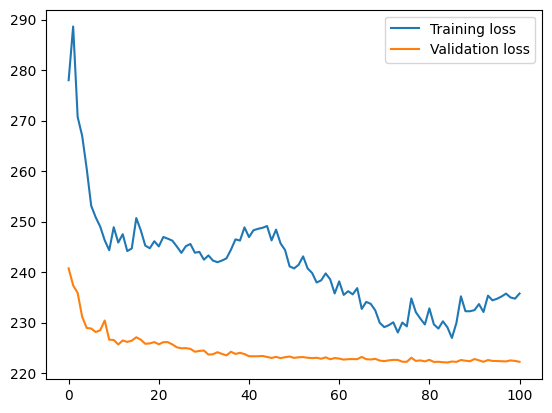

In [ ]:
from torchmetrics import R2Score
#model architecture
model = nn.Sequential(
    nn.Linear(27, 24),
    nn.BatchNorm1d(24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.BatchNorm1d(12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.BatchNorm1d(6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 101  # number of epochs to run
batch_size = 32 #the size of the batch

#blank lists to append the results for later plotting.
train_losses = []
val_losses = []

for epoch in range(n_epochs):
    model.train()
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    train_loss = loss.item()
    val_loss = 0
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        val_loss = loss_fn(y_pred, y_test)
        val_loss = float(val_loss)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if epoch == 1 or epoch % 10 == 0:
      print("Epoch %d had training loss %.4f" % (epoch, loss.item()))
      with torch.no_grad():
          model.eval()  # switch to evaluation mode
          y_pred = model(X_test)
          val_loss = loss_fn(y_pred, y_test)
          val_loss = float(val_loss)
          print("Validation loss: %.2f" % val_loss)
          r2score = R2Score()(y_pred, y_test)
          print("R2Score: %.2f" % r2score )
          mse = loss_fn(y_pred, y_test)
          mse = float(mse)
          print("MSE: %.2f" % mse)
          print("RMSE: %.2f" % np.sqrt(mse))

plt.plot(train_losses, label="Training loss")
plt.plot(val_losses, label="Validation loss")
plt.legend()
plt.show()

# CLASSIFICATION

We were not able to get high enough R squared scores trying to train a model to predict popularity scores. But what if we used supervised learning again, but this time with classification algorithms?
In order to do this, I had to create 4 bins, make the 0-100 range from the score and make them into ranges 0-25, 25-50, 50-75 and 75-100.

In [ ]:
clasi = pd.cut(data['popularity'],bins=4, labels=['low', 'some', 'moderate', 'high'])


In [ ]:
data['popularity'] = pd.cut(data.popularity ,bins=4, labels=['low', 'some', 'moderate', 'high'], right =True)

I prepared the data to classify. Now, because there is a very big skew in the class distribution of the data as we saw before in the frequency plot, we need to use RandomUnderSampler and RandomOverSampler. We will be removing samples from the majority class (under-sampling) and adding more examples from the minority class (over-sampling).

In [ ]:
y = data.popularity

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ros= RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)
print('Removed:')
print(X_ros.shape, y_ros.shape)

Removed:
(1103288, 27) (1103288,)


We then get more balanced data that we can then apply to our model to classify.

In [ ]:
y_ros.value_counts()

low         275822
some        275822
moderate    275822
high        275822
Name: popularity, dtype: int64

As we did with our regressor models, we separate our columns in order to predict our y, popularity.

In [ ]:
features_col= ['time_signature_1', 'time_signature_3','time_signature_4', 'time_signature_5',
           'duration_min', 'tempo', 'loudness', 'energy', 'danceability', 'explicit',
           'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11']

X=data[features_col]

The classifying supervised learning model that we will be using is KNeighbors. This will be used as it is an efficient model and lets us predict using classification with which we might be able to get better results. We first need to do some hyperparameter tuning in order to get the best k to use in our model. After a few runs, we decide on 3. This can be improved as the runs were less than 5, as each run took significant time. We split the data and run a loop to plot the accuracy. For this model I will not be using training/validation/test split, as it adds a lot of time complexity (in one attempt it was still going after an hour and a half) so it will have to be a simpler split because of computational restraints.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=42, test_size=0.25)


After some trial and error, I finally decided to have a K=3. KNN is not a lightweight model, it really takes some time. We implement our model and get:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)

score = accuracy_score(y_test, y_pred_class)
print('Accuracy: {:.2f}%'.format(score * 100))

Accuracy: 72.33%


So the score is such a massive improvement that we honestly might be having some overfitting. So, we check with a confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred_class)
print('TP - True Negative {}'.format(conf[0,0]))
print('FP - False Positive {}'.format(conf[0,1]))
print('FN - False Negative {}'.format(conf[1,0]))
print('TP - True Positive {}'.format(conf[1,1]))
print('Accuracy Score: {}'.format(np.divide(np.sum([conf[0,0], conf[1,1], conf[2,2]]), np.sum(conf)))) #accuracy score done by calculations
print('Misclassification Rate: {}'.format(np.divide(np.sum([conf[1,0], conf[0,1], conf[0,2], conf[2,0], conf[1,2], conf[2,1]]), np.sum(conf)))) #misclassifaction rate

TP - True Negative 68927
FP - False Positive 0
FN - False Negative 413
TP - True Positive 38003
Accuracy Score: 0.6087694237588009
Misclassification Rate: 0.05522402128909224


We get a better score of 60.87%. That is better than what we got for the regression models, but even so, it is not the best score in the world and it took some time to compute. This model predicts just *sometimes* not *everytime*. So, is it possible to really predict the popularity of a song using it's audio features?

# Conclusions

I think I can safely conclude that it is not possible to predict most of the times if a song is "popular" according to Spotify's audio features.

  The project proposal that was submitted also talked about incorporating data from the Billboard Top 100's chart, but when it came to actually work in this project and I dove into the data, I noticed that the Billboard chart was not very useful when it came to popularity. There were some songs in there that were not popular today by any means, and were on the lower side of the popularity score according to Spotify. So, if it was already quite complex, then adding "this song is popular according to Billboard but not to Spotify" would make it even more confusing to the model and increment the complexity. That is why I ultimately decided to just stick to Spotify's audio features.

  The dataset obtained gave good insights and it was very good that it had no bias. I had to investigate some things that I did not know about, like how Spotify calculates certain features of a song in order to understand. Even so, there were limits to this information, as how Spotify calculates the popularity is a total mystery. In Spotify's API documentation it mentions how it is a combination of different metrics such as recent stream, number of times it is added to a playlist, streams, etc. Because this is a total mystery, I am not able to give more efficient results. One would guess that it all comes down to total streams but no, as an example, "Sloop John B - Stereo / Remastered" by the Beach Boys today has about 69 million streams and has a score of 39, in comparison, "I will wait for you" by Frank Sinatra has a score of 40, but with 2 million streams.

  At first I treated this problem as a regression problem, as I had guessed that it would have given me better results but as we can see, that is not true, it was the classifier model which gave me the best result. Between the regressor models that I trained, (Linear Regression, Decision Tree, Forest, AdaBoost and Neural Network), in terms of small computational resources and time, the overrall best was without a doubt the Decision Tree, as it gave an R^2 score of 31.15%. It was the fastest to run and gave a score that was just enough. That is because the next models took between 7 minutes to an hour (NN). And yes, the NN gave the best result out of all but it took an hour. Also, I was a bit restrained, as it only ran for 100 epochs, when it could have been a lot longer but the computational resources and time would have exploded. Neural Networks took the longest time too as it took a lot of hyperparameter tuning, checking what worked and what didn't.

Not only that but I also tried different things that I thought would give me better score, such as making the popularity score binary (Less than 50 not popular, more than 50=popular) and cutting out the excess of songs with a popularity score = 0, but I found out that it gave me even worse results.


  Because of the lack of good results I was obtaining, I decided to try with a classifier model, KNN. It is also a very time consuming one, but it did the work and gave "good" results. If I had more time for this project, I would certainly experiment a lot more with classifying even though because of the disparity in the frequency of the data, it made things a little bit harder. Also, an argument can be made that I only got the score that I got because of RandomOverSampler which honestly could have played a part in getting a way better score. I do not think it was an error to experiment and treat this problem as a regression one, as at the start it was the more logical approach. Also, we have to note that if I were to split the data between training/test/validation, it not only would have taken more time, the accuracy of the predictions would have probably been even lower because I cannot guarantee that I will be able to retain the approximate level of accuracy on new unseen data.

  Now, regarding what we set out to find with this project, is it possible to predict the popularity of a song? I would say that it is not. There is no special formula for a song to become a success. The songs on the radio have some differences from one another. Most of them may be euphoric, filled with energy and make you want to dance, but others not really. Also, lyricism is a big influence on what can make a song popular. If it is very catchy, relatable and the melody is good enough, who cares? We should also take into account the recent rise to popularity of TikTok, an audio based app which is now changing the music industry, as small snippets of songs are becoming popular and the whole song is not even important. Just 15 seconds of a song that sounds good and has lyrics that could be applied to a video can make a song viral. If during the 1950's, 60's, 70's, 80's, 90's and 2000's no one had a hit song formula, we can say that now more than ever with the usage of social media and how easy it is to stream songs, it's more difficult to find one.
  But, this is not to say that there are no trends in music that if followed, hit songs can be made and be succesful, as we have certainly seen in the past with several music genres taking the spotlight. But, it even becomes more difficult as even those trends are very often a reflection of what people are living at the moment, major world events or what a society might be going through.


  In conclusion, we are dealing with a very subjective topic: art. Using mathematics and statistics, we may not be able to logically explain why we like what we like. Will an AI trained with Machine Learning create its own opinion regarding a subjective topic or will it take all its training and give a generalized opinion?

A prior version of this notebook that includes runs that are the basis for the decisions made in this final notebook can be found here: https://colab.research.google.com/drive/1qoFWoQok7c2LB5uaKrD_YC41wNL3LGSW?usp=sharing